In [1]:
import pandas as pd
import numpy as np
import os
import tqdm

from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.applications.densenet import DenseNet169,preprocess_input
from keras.initializers import glorot_uniform
from keras.models import Model
from keras.layers import Dense, Activation
from keras import regularizers
from keras.callbacks import EarlyStopping, TensorBoard

Using TensorFlow backend.


In [10]:
# CONSTANTS

DATASET_DIR = '../../'
TRAIN_IMAGES = '../../train_image_paths.csv'
TRAIN_LABELS = '../../train_labeled_studies.csv'

In [5]:
train_images = pd.read_csv(TRAIN_IMAGES, header = None)
train_labels = pd.read_csv(TRAIN_LABELS, header = None)

In [9]:
train_labels[0][0]

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/'

In [31]:
train_data = pd.DataFrame(columns = ['Path', 'Label'])
i=0
for j in range(len(train_labels[0].values)):
  try:
    for img in os.listdir(DATASET_DIR+train_labels[0][j]): 
      if '_' not in list(img):
        train_data.loc[i] = [train_labels[0][j]+img, int(train_labels[1][j])]
        i=i+1
        print(img)
  except:
    print(DATASET_DIR+train_labels[0][j])
    pass



image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png

image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png

image5.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image6.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png

image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png

image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png

image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png

image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png

image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png

image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png

image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png

image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png

image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png

image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png

image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image1.png

image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png

image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png

image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image7.png
image3.png
image5.png
image1.png
image4.png
image6.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png

image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image7.png
image3.png
image5.png
image1.png
image4.png
image6.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png

image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png

image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png

image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png

image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png

image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png

image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png

image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image7.png
image3.png
image5.png
image1.png
image4.png
image6.png
image2.png
image3.png
image5.png
image1.png
image4.png
image6.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image1.png
image1.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image1.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image1.png
image2.png
image1.png
image1.png
image1.png
image2.png
image1.png
image1.png
image1.png
image1.png
image2.png
image1.png
image1.png
image1.png
image2.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png

image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image7.png
image3.png
image5.png
image1.png
image4.png
image6.png
image2.png
image3.png
image1.png
image2.png
image3.png

image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png

image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png

image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png

image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image5.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png

image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png

image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image4.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png

image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png

image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png
image1.png
image2.png
image1.png
image2.png
image3.png

In [12]:
train_data

Path Label
0      MURA-v1.1/train/XR_SHOULDER/patient00001/study...     1
1      MURA-v1.1/train/XR_SHOULDER/patient00001/study...     1
2      MURA-v1.1/train/XR_SHOULDER/patient00001/study...     1
3      MURA-v1.1/train/XR_SHOULDER/patient00002/study...     1
4      MURA-v1.1/train/XR_SHOULDER/patient00002/study...     1
5      MURA-v1.1/train/XR_SHOULDER/patient00002/study...     1
6      MURA-v1.1/train/XR_SHOULDER/patient00003/study...     1
7      MURA-v1.1/train/XR_SHOULDER/patient00003/study...     1
8      MURA-v1.1/train/XR_SHOULDER/patient00003/study...     1
9      MURA-v1.1/train/XR_SHOULDER/patient00004/study...     1
10     MURA-v1.1/train/XR_SHOULDER/patient00004/study...     1
11     MURA-v1.1/train/XR_SHOULDER/patient00004/study...     1
12     MURA-v1.1/train/XR_SHOULDER/patient00004/study...     1
13     MURA-v1.1/train/XR_SHOULDER/patient00005/study...     1
14     MURA-v1.1/train/XR_SHOULDER/patient00006/study...     1
15     MURA-v1.1/train/XR_SHOULDER/patient00006/study...     1
16     MURA-v1.1/train/XR_SHOULDER/patient00007/study...     1
17     MURA-v1.1/train/XR_SHOULDER/patient00007/study...     1
18     MURA-v1.1/train/XR_SHOULDER/patient00007/study...     1
19     MURA-v1.1/train/XR_SHOULDER/patient00007/study...     0
20     MURA-v1.1/train/XR_SHOULDER/patient00007/study...     0
21     MURA-v1.1/train/XR_SHOULDER/patient00007/study...     0
22     MURA-v1.1/train/XR_SHOULDER/patient00007/study...     0
23     MURA-v1.1/train/XR_SHOULDER/patient00008/study...     1
24     MURA-v1.1/train/XR_SHOULDER/patient00008/study...     1
25     MURA-v1.1/train/XR_SHOULDER/patient00008/study...     1
26     MURA-v1.1/train/XR_SHOULDER/patient00009/study...     1
27     MURA-v1.1/train/XR_SHOULDER/patient00010/study...     1
28     MURA-v1.1/train/XR_SHOULDER/patient00010/study...     1
29     MURA-v1.1/train/XR_SHOULDER/patient00011/study...     1
...                                                  ...   ...
36778  MURA-v1.1/train/XR_HAND/patient11175/study1_ne...     0
36779  MURA-v1.1/train/XR_HAND/patient11175/study1_ne...     0
36780  MURA-v1.1/train/XR_HAND/patient11175/study1_ne...     0
36781  MURA-v1.1/train/XR_HAND/patient11176/study1_ne...     0
36782  MURA-v1.1/train/XR_HAND/patient11176/study1_ne...     0
36783  MURA-v1.1/train/XR_HAND/patient11176/study1_ne...     0
36784  MURA-v1.1/train/XR_HAND/patient11177/study1_ne...     0
36785  MURA-v1.1/train/XR_HAND/patient11177/study1_ne...     0
36786  MURA-v1.1/train/XR_HAND/patient11177/study1_ne...     0
36787  MURA-v1.1/train/XR_HAND/patient11178/study1_ne...     0
36788  MURA-v1.1/train/XR_HAND/patient11178/study1_ne...     0
36789  MURA-v1.1/train/XR_HAND/patient11178/study1_ne...     0
36790  MURA-v1.1/train/XR_HAND/patient04107/study1_ne...     0
36791  MURA-v1.1/train/XR_HAND/patient04107/study1_ne...     0
36792  MURA-v1.1/train/XR_HAND/patient11179/study1_ne...     0
36793  MURA-v1.1/train/XR_HAND/patient11179/study1_ne...     0
36794  MURA-v1.1/train/XR_HAND/patient11179/study1_ne...     0
36795  MURA-v1.1/train/XR_HAND/patient11180/study1_ne...     0
36796  MURA-v1.1/train/XR_HAND/patient11181/study1_ne...     0
36797  MURA-v1.1/train/XR_HAND/patient11181/study1_ne...     0
36798  MURA-v1.1/train/XR_HAND/patient11181/study1_ne...     0
36799  MURA-v1.1/train/XR_HAND/patient11182/study1_ne...     0
36800  MURA-v1.1/train/XR_HAND/patient11182/study1_ne...     0
36801  MURA-v1.1/train/XR_HAND/patient11182/study1_ne...     0
36802  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...     0
36803  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...     0
36804  MURA-v1.1/train/XR_HAND/patient11183/study1_ne...     0
36805  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...     0
36806  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...     0
36807  MURA-v1.1/train/XR_HAND/patient11184/study1_ne...     0

[36808 rows x 2 columns]

In [32]:
# train_data.Label.astype(str)
train_data['Label'] = pd.to_numeric(train_data['Label'])

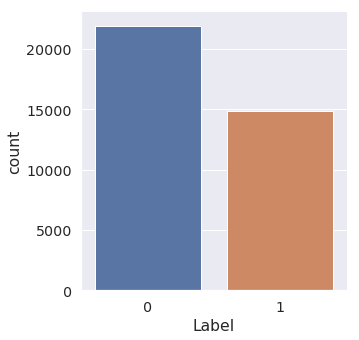

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

sns.catplot(x="Label", data=train_data, kind="count")
plt.show();

In [20]:
def build_model():
  
    base_model = DenseNet169(
                          weights='imagenet', 
                          input_shape=(224, 224, 3), 
                          pooling='avg', 
                          classes=1000)
    
    for layer in base_model.layers:
        layer.trainable = True

    x = base_model.output
    x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    x = Activation('relu')(x)
    
    predictions = Dense(1,activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

In [21]:
model = build_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'mse'])

58548224/58541896 [==============================] - 196s 3us/step


In [22]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [33]:
from sklearn.model_selection import train_test_split

train_data,val_data,_,_=train_test_split(train_data, train_data['Label'] , test_size=0.1, random_state=42)

In [34]:
train_data

Path  Label
33250  MURA-v1.1/train/XR_HAND/patient00648/study1_ne...      0
2571   MURA-v1.1/train/XR_SHOULDER/patient00817/study...      1
4170   MURA-v1.1/train/XR_SHOULDER/patient01354/study...      1
130    MURA-v1.1/train/XR_SHOULDER/patient00043/study...      1
18238  MURA-v1.1/train/XR_ELBOW/patient05898/study1_n...      0
11379  MURA-v1.1/train/XR_FINGER/patient03719/study1_...      1
14383  MURA-v1.1/train/XR_FINGER/patient04767/study1_...      0
26658  MURA-v1.1/train/XR_WRIST/patient08303/study1_n...      0
34868  MURA-v1.1/train/XR_HAND/patient10667/study1_ne...      0
11097  MURA-v1.1/train/XR_FINGER/patient03640/study1_...      1
748    MURA-v1.1/train/XR_SHOULDER/patient00237/study...      1
29319  MURA-v1.1/train/XR_WRIST/patient09053/study1_n...      0
35988  MURA-v1.1/train/XR_HAND/patient10966/study1_ne...      0
6885   MURA-v1.1/train/XR_SHOULDER/patient02219/study...      0
2726   MURA-v1.1/train/XR_SHOULDER/patient00867/study...      1
11997  MURA-v1.1/train/XR_FINGER/patient03917/study1_...      0
26813  MURA-v1.1/train/XR_WRIST/patient08350/study1_n...      0
4955   MURA-v1.1/train/XR_SHOULDER/patient01613/study...      0
31187  MURA-v1.1/train/XR_FOREARM/patient09708/study1...      0
33478  MURA-v1.1/train/XR_HAND/patient05735/study1_ne...      0
10031  MURA-v1.1/train/XR_FINGER/patient03326/study1_...      1
21808  MURA-v1.1/train/XR_WRIST/patient06054/study1_p...      1
8094   MURA-v1.1/train/XR_SHOULDER/patient02602/study...      0
19825  MURA-v1.1/train/XR_WRIST/patient06393/study1_p...      1
18874  MURA-v1.1/train/XR_ELBOW/patient06101/study1_n...      0
32324  MURA-v1.1/train/XR_HAND/patient03874/study1_po...      1
8310   MURA-v1.1/train/XR_SHOULDER/patient02672/study...      0
14695  MURA-v1.1/train/XR_FINGER/patient04881/study1_...      0
2834   MURA-v1.1/train/XR_SHOULDER/patient00904/study...      1
19015  MURA-v1.1/train/XR_ELBOW/patient06148/study1_n...      0
...                                                  ...    ...
30740  MURA-v1.1/train/XR_FOREARM/patient09543/study1...      0
3890   MURA-v1.1/train/XR_SHOULDER/patient01262/study...      1
3556   MURA-v1.1/train/XR_SHOULDER/patient01148/study...      1
11394  MURA-v1.1/train/XR_FINGER/patient03725/study1_...      1
31551  MURA-v1.1/train/XR_HAND/patient09806/study2_po...      1
1267   MURA-v1.1/train/XR_SHOULDER/patient00392/study...      1
1899   MURA-v1.1/train/XR_SHOULDER/patient00600/study...      1
35773  MURA-v1.1/train/XR_HAND/patient10909/study1_ne...      0
19118  MURA-v1.1/train/XR_ELBOW/patient06181/study1_n...      0
189    MURA-v1.1/train/XR_SHOULDER/patient00062/study...      1
2747   MURA-v1.1/train/XR_SHOULDER/patient00872/study...      1
18431  MURA-v1.1/train/XR_ELBOW/patient05961/study1_n...      0
18942  MURA-v1.1/train/XR_ELBOW/patient06125/study1_n...      0
25658  MURA-v1.1/train/XR_WRIST/patient04463/study1_n...      0
27480  MURA-v1.1/train/XR_WRIST/patient08540/study1_n...      0
6396   MURA-v1.1/train/XR_SHOULDER/patient02062/study...      0
28693  MURA-v1.1/train/XR_WRIST/patient08880/study1_n...      0
19769  MURA-v1.1/train/XR_WRIST/patient06379/study1_p...      1
17568  MURA-v1.1/train/XR_ELBOW/patient05686/study1_n...      0
5311   MURA-v1.1/train/XR_SHOULDER/patient01722/study...      0
2433   MURA-v1.1/train/XR_SHOULDER/patient00764/study...      1
769    MURA-v1.1/train/XR_SHOULDER/patient00242/study...      1
1685   MURA-v1.1/train/XR_SHOULDER/patient00532/study...      1
16023  MURA-v1.1/train/XR_ELBOW/patient05242/study1_p...      1
21962  MURA-v1.1/train/XR_WRIST/patient06937/study1_p...      1
16850  MURA-v1.1/train/XR_ELBOW/patient05474/study1_n...      0
6265   MURA-v1.1/train/XR_SHOULDER/patient02020/study...      0
11284  MURA-v1.1/train/XR_FINGER/patient03692/study1_...      1
860    MURA-v1.1/train/XR_SHOULDER/patient00274/study...      1
15795  MURA-v1.1/train/XR_ELBOW/patient05178/study1_p...      1

[33127 rows x 2 columns]

In [35]:
val_data.shape

(3681, 2)

In [36]:
NUM_SAMPLES=train_data.shape[0]
VAL_SIZE=val_data.shape[0]
BATCH_SIZE=128
NUM_EPOCHS = 30

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data, 
    directory  = DATASET_DIR, 
    x_col = "Path", 
    y_col = "Label", 
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='other', 
    batch_size=32
)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale = 1. /255)

In [ ]:
val_generator = val_datagen.flow_from_dataframe(
    dataframe = val_data, 
    directory  = DATASET_DIR, 
    x_col = "Path", 
    y_col = "Label", 
    target_size=(224, 224),
    color_mode='rgb', 
    class_mode='other', 
    batch_size=32
)

In [ ]:
model.fit_generator(
    generator = train_generator, 
    steps_per_epoch = NUM_SAMPLES/BATCH_SIZE,
    epochs=10,
    verbose=1, 
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=7, 
            min_delta=0.0001
        ),
        TensorBoard(
            log_dir='Graph_complete', 
            histogram_freq=0, 
            write_graph=True, 
            write_images=True
        )
    ], 
    validation_data=val_generator, 
    validation_steps = VAL_SIZE/BATCH_SIZE,
    shuffle=True
)

In [ ]:
from keras.models import model_from_json
with open('arch_FULL_DATA.json','r') as f:
  model=model_from_json(f.read())
model.load_weights('weight_FULL_DATA.h5')